# Import packages

In [1]:
import pandas as pd
import ml_help
from sklearn.model_selection import train_test_split
plot_label="Volume"

# Load and prepare data

In [2]:
count_df = pd.read_csv("./data/gardiner_count.csv.zip")
weather_df = pd.read_csv("./data/weather_data.csv.zip")

In [3]:
count_df["datetime_bin"] = pd.to_datetime(count_df["datetime_bin"],utc=True)
weather_df["collectedAt"] = pd.to_datetime(weather_df["collectedAt"],utc=True)

In [4]:
count_df.drop(['month', 'day', 'day_of_week', 'hour', 'minute'],inplace=True,axis=1)
weather_df.drop(['month', 'day', 'day_of_week', 'day_of_week_name', 'hour', 'minute', 'windDegree'],inplace=True,axis=1)

## Merge flow and weather sets

In [5]:
df = count_df.merge(weather_df,left_on="datetime_bin", right_on="collectedAt", how="inner")
df.head()

,datetime_bin,volume_15min,number_of_lanes,direction,dist_from_mid_point,visibility,collectedAt,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,snow1h,cloudy,clear,atmosphere,snowy,rainy
0,2022-08-11 17:00:00,1216,3,W,1.826035,10.0,2022-08-11 17:00:00,25.04,24.83,47,7.72,40,0.0,0.0,1,0,0,0,0
1,2022-08-11 17:00:00,895,3,E,1.832536,10.0,2022-08-11 17:00:00,25.04,24.83,47,7.72,40,0.0,0.0,1,0,0,0,0
2,2022-08-11 17:00:00,1193,3,W,0.474912,10.0,2022-08-11 17:00:00,25.04,24.83,47,7.72,40,0.0,0.0,1,0,0,0,0
3,2022-08-11 17:00:00,1097,3,E,0.474912,10.0,2022-08-11 17:00:00,25.04,24.83,47,7.72,40,0.0,0.0,1,0,0,0,0
4,2022-08-11 17:00:00,829,3,W,-0.633557,10.0,2022-08-11 17:00:00,25.04,24.83,47,7.72,40,0.0,0.0,1,0,0,0,0


## Extract data from collectedAt

In [6]:
df["month"] = df.collectedAt.dt.month
df["day_of_week"] = df.collectedAt.dt.weekday
df["hour"] = df.collectedAt.dt.hour
df["minute"] = df.collectedAt.dt.minute
df.drop("collectedAt",inplace=True,axis=1)
df.drop("datetime_bin",inplace=True,axis=1)
df.head()

,volume_15min,number_of_lanes,direction,dist_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,...,cloudy,clear,atmosphere,snowy,rainy,month,day,day_of_week,hour,minute
0,1216,3,W,1.826035,10.0,25.04,24.83,47,7.72,40,...,1,0,0,0,0,8,11,3,17,0
1,895,3,E,1.832536,10.0,25.04,24.83,47,7.72,40,...,1,0,0,0,0,8,11,3,17,0
2,1193,3,W,0.474912,10.0,25.04,24.83,47,7.72,40,...,1,0,0,0,0,8,11,3,17,0
3,1097,3,E,0.474912,10.0,25.04,24.83,47,7.72,40,...,1,0,0,0,0,8,11,3,17,0
4,829,3,W,-0.633557,10.0,25.04,24.83,47,7.72,40,...,1,0,0,0,0,8,11,3,17,0


In [7]:
categorical_attrs = ["direction", "month", "day_of_week"]

transformed_df = pd.get_dummies(df, columns=categorical_attrs)
transformed_df = transformed_df.astype("float32")
transformed_df.head()

,volume_15min,number_of_lanes,dist_from_mid_point,visibility,temperature,FeelsLike,humidity,windSpeed,cloudsAll,rain1h,...,month_10,month_11,month_12,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,1216.0,3.0,1.826035,10.0,25.040001,24.83,47.0,7.72,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,895.0,3.0,1.832536,10.0,25.040001,24.83,47.0,7.72,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1193.0,3.0,0.474912,10.0,25.040001,24.83,47.0,7.72,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1097.0,3.0,0.474912,10.0,25.040001,24.83,47.0,7.72,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,829.0,3.0,-0.633557,10.0,25.040001,24.83,47.0,7.72,40.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Split data set into train and test

In [8]:
X = transformed_df.drop("volume_15min",axis=1)
y = transformed_df["volume_15min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

## Sample 50% of remaining training data to run CV.
- The idea is have enough data that is representative of the dataset, while speeding up the CV performed by GridSearchCV.

In [9]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Show model metrics to determine what algorithms to run

In [10]:
metrics = pd.read_csv("./metrics/052_initial_metrics.csv.zip")
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.943220,65.287690,8814.772000,93.887020,2.618876e+15,0.547647,0.033839
1,Random Forest,0.936224,63.331879,9900.922852,99.503380,2.152246e+15,8.511697,0.394769
2,Decision Tree,0.931532,59.951613,10629.394058,103.098953,2.023950e+15,0.870931,0.019068
3,MLP,0.807568,129.079600,29874.117000,172.841310,5.580621e+15,100.547920,0.026862
4,Lasso,0.353680,258.268066,100337.968750,316.761688,5.541303e+15,0.078015,0.016893
5,Linear Regression,0.353660,257.662292,100341.148438,316.766724,5.575402e+15,0.149817,0.021475
6,Elastic Net,0.300550,275.181122,108586.171875,329.524170,5.536112e+15,0.064460,0.019054
7,Logistic Regression,0.054772,265.435883,146741.906250,383.069061,1.471710e+15,1.959041,0.032683


# Run ML tasks

## Random Forest

Best params for Random Forest already found!
Fitting model...
Fitting model... OK! Took 49.79327630996704 seconds

model Random Forest
r2 0.8454499320357001
mae 112.91454773777903
mse 24071.056480451087
rmse 155.14849815725285
mape 5327014468047916.0
time_to_fit 49.79327630996704
time_to_predict 0.2762153148651123

Dumping model...
Dumping model... OK! Took 0.5269327163696289 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


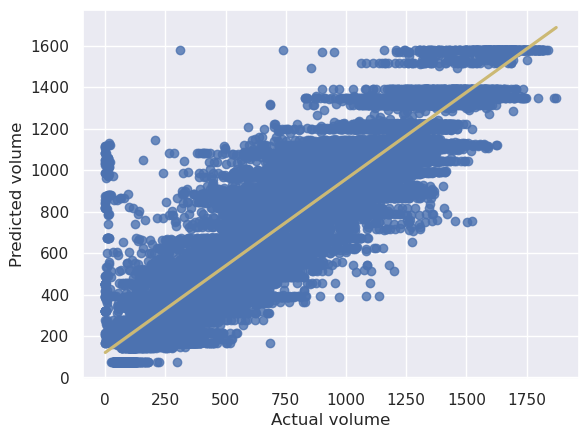

In [11]:
from sklearn.ensemble import RandomForestRegressor

file_name = "053_random_forest"
model_name = "Random Forest"

param_grid = {
    "n_estimators": [100,200,300],
    "max_depth": [16,32,48],
    "max_leaf_nodes": [10,50,100],
    "min_samples_leaf": [1,5,10],
    "min_samples_split": [2,8,16]
}

estimator = RandomForestRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, RandomForestRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## Decision Tree

Testing 750 param combinations for Decision Tree. CV=5. Total fits: 3750

Searching space...
Fitting 5 folds for each of 750 candidates, totalling 3750 fits
Searching space... OK! Took 80.43042039871216 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 0.43492984771728516 seconds

model Decision Tree
r2 0.839317508142932
mae 114.69417949116321
mse 25026.176874956425
rmse 158.19663989780702
mape 5401650476824312.0
time_to_fit 0.43492984771728516
time_to_predict 0.011705398559570312

Dumping model...
Dumping model... OK! Took 0.004542350769042969 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


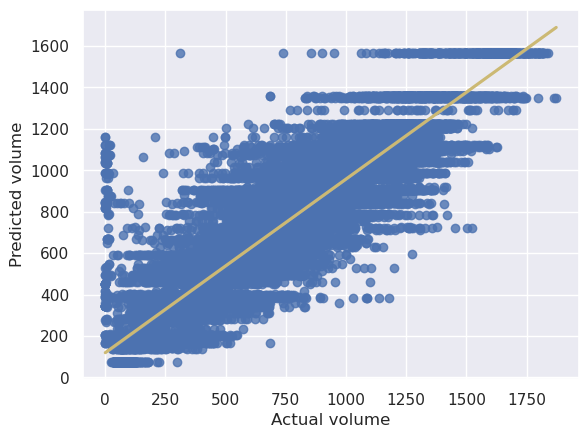

In [12]:
from sklearn.tree import DecisionTreeRegressor

file_name = "053_decision_tree"
model_name = "Decision Tree"

param_grid = {
    "random_state": [42],
    "criterion": ["squared_error"],
    "splitter": ["best"],
    "max_depth": [6,8,16,32,64,128],
    "min_samples_split": [2,4,8,16,32],
    "min_samples_leaf": [1,5,10,15,30],
    "max_leaf_nodes": [10,30,50,75,100]
}

estimator = DecisionTreeRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, DecisionTreeRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## XGBoost

Testing 243 param combinations for XGBoost. CV=5. Total fits: 1215

Searching space...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Searching space... OK! Took 7186.521420717239 seconds
Storing best params...
Storing best params... OK
Fitting model...
Fitting model... OK! Took 11.219901084899902 seconds

model XGBoost
r2 0.9668779711022739
mae 49.655174
mse 5158.731
rmse 71.8243
mape 2428004300000000.0
time_to_fit 11.219901084899902
time_to_predict 0.09918904304504395

Dumping model...
Dumping model... OK! Took 0.6145398616790771 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


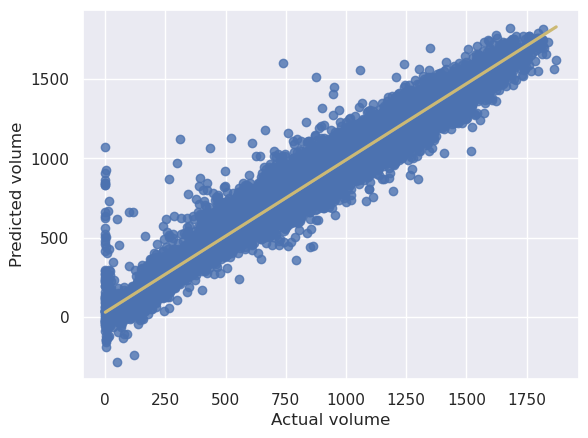

In [13]:
import xgboost as xgb

file_name = "053_xgboost"
model_name = "XGBoost"

param_grid = {
    "random_state": [42],
    "objective": ["reg:squarederror"],
    "tree_method": ["gpu_hist"],
    "predictor": ["gpu_predictor"],
    "num_parallel_tree": [10],
    "max_depth": [6, 8, 16],
    "n_estimators": [100, 250, 350],
    "max_leaves": [20, 40, 80],
    "alpha": [0.01, 0.1, 1],
    "learning_rate": [0.3, 0.5, 0.9]
}

estimator = xgb.XGBRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)
    
model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, xgb.XGBRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train

## MLP

Testing 216 param combinations for MLP. CV=5. Total fits: 1080

Searching space...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
 

Searching space... OK! Took 2792.261774778366 seconds
Storing best params...
Storing best params... OK
Fitting model...


/home/felipe/miniconda3/envs/rapids/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Fitting model... OK! Took 278.1248571872711 seconds

model MLP
r2 0.9296493592704561
mae 72.45374
mse 10957.059
rmse 104.67597
mape 3889190600000000.0
time_to_fit 278.1248571872711
time_to_predict 0.05550050735473633

Dumping model...
Dumping model... OK! Took 0.03107309341430664 seconds


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


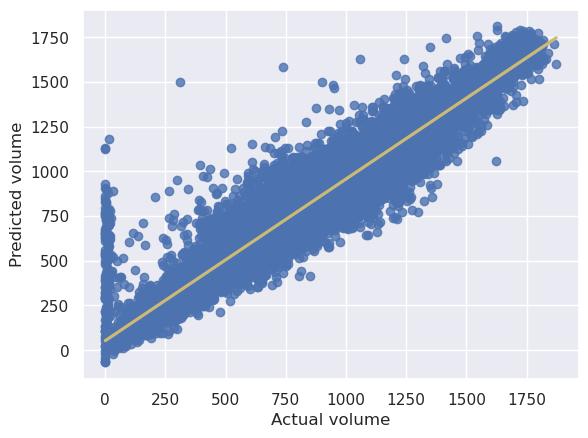

In [14]:
from sklearn.neural_network import MLPRegressor

file_name = "053_mlpr"
model_name = "MLP"

param_grid = {
    "random_state": [42],
    "hidden_layer_sizes": [(100), (100,50), (100,50,25)],
    "alpha": [0.0001, 0.001, 0.1],
    "learning_rate_init": [0.001, 0.1],
    "max_iter": [500, 600, 700],
    "tol": [1e-4],
    "epsilon": [1e-8, 1e-4],
    "n_iter_no_change": [3, 10]
}

estimator = MLPRegressor()

best_params = ml_help.run_param_search(estimator, param_grid, file_name, model_name, X_train_sample, y_train_sample, verbose=1)
best_params.drop(["score", "model"],axis=1,inplace=True)

params = ml_help.params_to_dict(file_name)

model_train, model_metrics_train = ml_help.train_and_test(file_name, model_name, MLPRegressor(**params), X_train, X_val, y_train, y_val, plot_label, dump_model=True, show_plot=True)
del model_train